# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("./data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.shape

(614, 13)

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


Look at some basic statistics for numerical variables.

In [4]:
df[df['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [5]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [6]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [7]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [9]:
df.Credit_History.describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

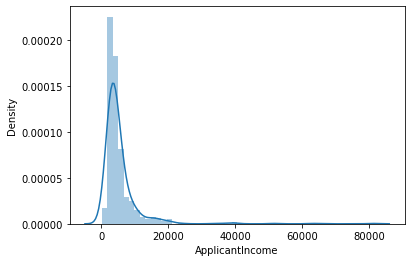

In [10]:
sns.distplot(df['ApplicantIncome'])

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

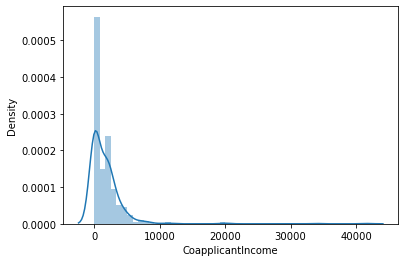

In [11]:
sns.distplot(df['CoapplicantIncome'])

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [12]:
def print_cat_describe(df):
    for col in df.dtypes[df.dtypes == 'object'].index:
        print("Variable: ", col)
        print(df[col].describe())
        print("Unique values: ", df[col].unique())
        print('')

In [13]:
print_cat_describe(df)

Variable:  Loan_ID
count          614
unique         614
top       LP001903
freq             1
Name: Loan_ID, dtype: object
Unique values:  ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [14]:
df.dtypes[df.dtypes == 'object']

Loan_ID          object
Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [15]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [16]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [18]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [19]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [21]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

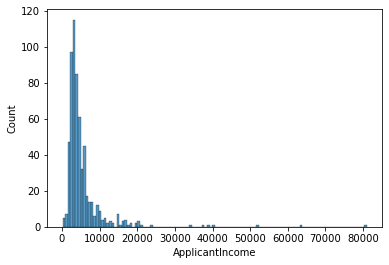

In [22]:
sns.histplot(df['ApplicantIncome'])


Look at box plots to understand the distributions. 

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

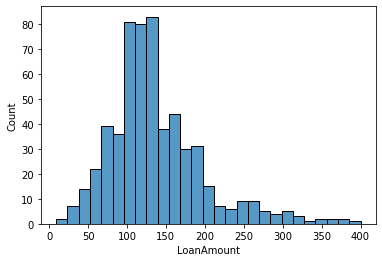

In [23]:
filter = df['LoanAmount'] <= 400
sns.histplot(df[filter]['LoanAmount'])

In [24]:
df[filter]['LoanAmount'].describe()

count    578.000000
mean     137.186851
std       61.150889
min        9.000000
25%      100.000000
50%      126.000000
75%      161.000000
max      400.000000
Name: LoanAmount, dtype: float64

In [25]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [26]:
out = pd.cut(df.ApplicantIncome, bins=[0, 40000, 100000], include_lowest=True)
plot = out.value_counts(sort=False)

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

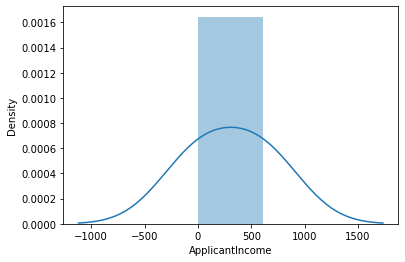

In [27]:
sns.distplot(plot)

Look at the distribution of income segregated  by `Education`

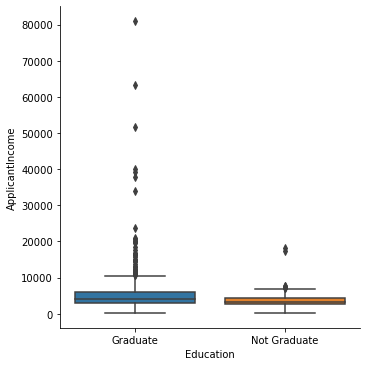

In [28]:
sns.catplot(x="Education", y="ApplicantIncome", kind="box", data=df)

Look at the histogram and boxplot of LoanAmount

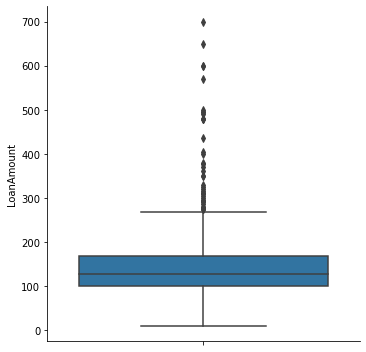

In [29]:
sns.catplot(y="LoanAmount", kind="box", data=df)

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [30]:
df.pivot_table

<bound method DataFrame.pivot_table of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849   

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

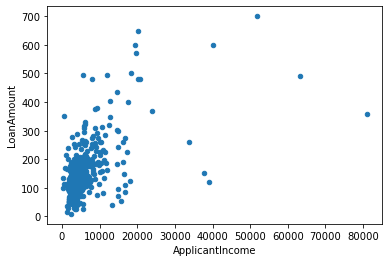

In [31]:
var = 'ApplicantIncome'
data = df[['LoanAmount',var]]
data.plot.scatter(x=var, y='LoanAmount')

<AxesSubplot:>

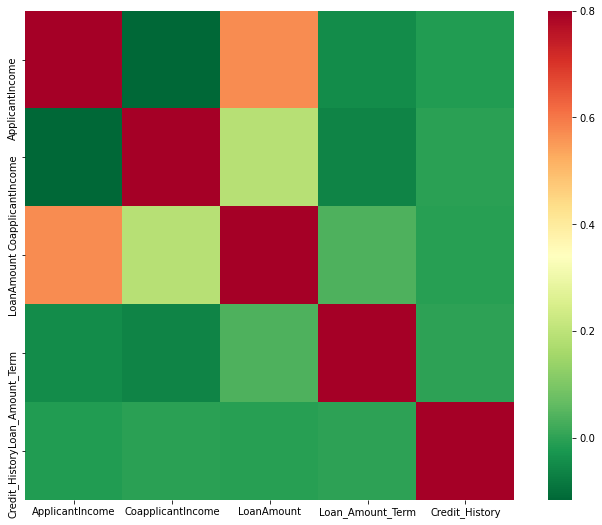

In [32]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

In [33]:
df[df['Married']== 'Yes']['CoapplicantIncome'].describe()

count      398.000000
mean      1794.632965
std       2039.962354
min          0.000000
25%          0.000000
50%       1625.000000
75%       2464.000000
max      20000.000000
Name: CoapplicantIncome, dtype: float64

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [34]:
# Separate target variable
print(df.shape)
# filter = df['LoanAmount'] <= 400
# df = df[filter]
print(df.shape)
y = df.iloc[:,-1]
df = df.drop(['Loan_Status'], axis=1)

print(y.shape)
print(df.shape)

(614, 13)
(614, 13)
(614,)
(614, 12)


In [35]:
y = y.replace({'Y': 1,'N': 0}).astype(int)
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [36]:
# Replace by mean
# Married if CoapplicantIncome median is > 0
df.fillna({'Credit_History': 0,
            'Self_Employed': 'Not_specified',
            'LoanAmount': df['LoanAmount'].median(),
            'Dependents': df['Dependents'].mode()[0],
            'Loan_Amount_Term': df['Loan_Amount_Term'].median(),
            'Gender': 'Not_specified',
            'Married': 'No'}, inplace=True)

In [37]:
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0
Married,0,0.0


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [38]:
df['LoanAmount'] = df['LoanAmount'].apply(np.log)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

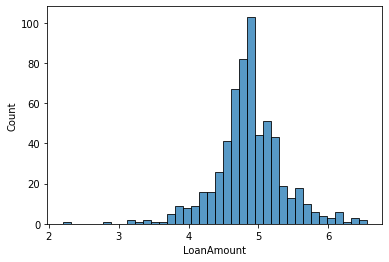

In [39]:
sns.histplot(df['LoanAmount'])

In [40]:
df['LoanAmount'].apply(np.log).describe()

count    614.000000
mean       1.575003
std        0.106563
min        0.787195
25%        1.527719
50%        1.579397
75%        1.630108
max        1.879630
Name: LoanAmount, dtype: float64

Combine both incomes as total income and take a log transformation of the same.

In [41]:
df['TotalIncome'] = (df['ApplicantIncome'] + df['CoapplicantIncome']).apply(np.log)

In [42]:
df.TotalIncome.describe()

count    614.000000
mean       8.669414
std        0.545102
min        7.273786
25%        8.334712
50%        8.597205
75%        8.925549
max       11.302204
Name: TotalIncome, dtype: float64

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

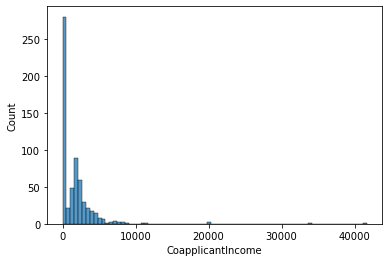

In [43]:
sns.histplot(df['CoapplicantIncome'])

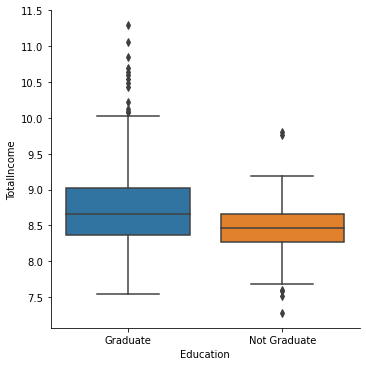

In [44]:
sns.catplot(x="Education", y="TotalIncome", kind="box", data=df)

In [45]:
#df = df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], axis=1)
df = df.drop(['Loan_ID'], axis=1)

In [46]:
df.dtypes[df.dtypes == 'object']

Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
dtype: object

In [47]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,4.852030,360.0,1.0,Urban,8.674026
1,Male,Yes,1,Graduate,No,4583,1508.0,4.852030,360.0,1.0,Rural,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,4.189655,360.0,1.0,Urban,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,4.787492,360.0,1.0,Urban,8.505323
4,Male,No,0,Graduate,No,6000,0.0,4.948760,360.0,1.0,Urban,8.699515


In [48]:
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [49]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df[cat_feats])
df_dummy.head()

,Gender_Female,Gender_Male,Gender_Not_specified,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Not_specified,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0
2,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
4,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1


In [50]:
df.dtypes[df.dtypes == 'object']

Gender           object
Married          object
Dependents       object
Education        object
Self_Employed    object
Property_Area    object
dtype: object

In [51]:
df_oneHot = pd.concat([df.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'], axis=1), df_dummy.drop(['Gender_Not_specified','Self_Employed_Not_specified'],axis=1)], axis=1)
#train_cleaned = train_cleaned.drop(['mkt_unique_carrier'], axis=1)

df_oneHot

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,4.852030,360.0,1.0,8.674026,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,4.852030,360.0,1.0,8.714568,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,4.189655,360.0,1.0,8.006368,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,4.787492,360.0,1.0,8.505323,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,4.948760,360.0,1.0,8.699515,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,4.262680,360.0,1.0,7.972466,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,3.688879,180.0,1.0,8.320205,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,5.533389,360.0,1.0,9.025456,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,5.231109,360.0,1.0,8.933664,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [52]:
# missing data
total = df_oneHot.isnull().sum().sort_values(ascending=False)
percent = (df_oneHot.isnull().sum()/df_oneHot.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Property_Area_Urban,0,0.0
Married_Yes,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0
Credit_History,0,0.0
TotalIncome,0,0.0
Gender_Female,0,0.0
Gender_Male,0,0.0
Married_No,0,0.0


In [53]:
df_oneHot.shape

(614, 21)

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_oneHot.astype(float)), columns=df_oneHot.columns)
df_scaled.shape


(614, 21)

In [55]:
df_scaled.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,...,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-2.694189e-17,-3.977998e-18,1.021509e-15,1.795524e-16,-1.732237e-16,1.757823e-15,3.616362e-17,-3.066675e-16,9.872667e-17,6.292469e-17,...,1.363368e-16,-1.123784e-16,7.919832e-17,-1.121072e-17,1.121072e-17,-9.040904e-17,-1.338054e-16,-4.292621e-16,1.330821e-16,6.585395e-16
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,...,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-8.606493e-01,-5.544873e-01,-5.367374e+00,-5.132498e+00,-1.848585e+00,-2.562394e+00,-4.723426e-01,-1.977878e+00,-7.366910e-01,-1.357421e+00,...,-4.463393e-01,-4.437128e-01,-3.009753e-01,-1.892641e+00,-5.283622e-01,-2.094270e+00,-3.926007e-01,-6.414782e-01,-7.820157e-01,-7.002080e-01
25%,-4.138159e-01,-5.544873e-01,-5.036252e-01,2.732313e-01,5.409543e-01,-6.145182e-01,-4.723426e-01,5.055924e-01,-7.366910e-01,-1.357421e+00,...,-4.463393e-01,-4.437128e-01,-3.009753e-01,5.283622e-01,-5.283622e-01,4.774935e-01,-3.926007e-01,-6.414782e-01,-7.820157e-01,-7.002080e-01
50%,-2.606393e-01,-1.480047e-01,-1.053273e-02,2.732313e-01,5.409543e-01,-1.325759e-01,-4.723426e-01,5.055924e-01,-7.366910e-01,7.366910e-01,...,-4.463393e-01,-4.437128e-01,-3.009753e-01,5.283622e-01,-5.283622e-01,4.774935e-01,-3.926007e-01,-6.414782e-01,-7.820157e-01,-7.002080e-01
75%,6.414426e-02,2.312023e-01,4.987483e-01,2.732313e-01,5.409543e-01,4.702697e-01,-4.723426e-01,5.055924e-01,1.357421e+00,7.366910e-01,...,-4.463393e-01,-4.437128e-01,-3.009753e-01,5.283622e-01,-5.283622e-01,4.774935e-01,-3.926007e-01,1.558899e+00,1.278747e+00,1.428147e+00
max,1.238462e+01,1.369617e+01,3.417794e+00,2.137276e+00,5.409543e-01,4.833847e+00,2.117107e+00,5.055924e-01,1.357421e+00,7.366910e-01,...,2.240448e+00,2.253710e+00,3.322532e+00,5.283622e-01,1.892641e+00,4.774935e-01,2.547117e+00,1.558899e+00,1.278747e+00,1.428147e+00


## 4. Building a Predictive Model

In [111]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2)

In [112]:
#X_train, X_test, y_train, y_test = train_test_split(df_oneHot, y, test_size=0.2)

In [113]:
X_train = X_train.drop('TotalIncome', axis=1)
X_test = X_test.drop('TotalIncome', axis=1)

In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 20)
(123, 20)
(491,)
(123,)


### Random Forest Classificator

In [115]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [116]:
n_estimators =300

rf_class = RandomForestClassifier(n_estimators=n_estimators, max_depth=None, n_jobs=-1, random_state=0)
rf_class.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0)

In [117]:
y_pred =rf_class.predict(X_test)

<AxesSubplot:>

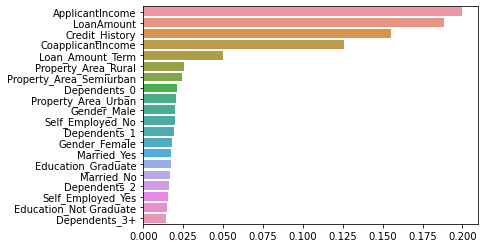

In [118]:
# feature importance
feature_imp = pd.Series(rf_class.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)

In [119]:
feature_imp

ApplicantIncome            0.199821
LoanAmount                 0.188572
Credit_History             0.154988
CoapplicantIncome          0.126028
Loan_Amount_Term           0.050008
Property_Area_Rural        0.025503
Property_Area_Semiurban    0.024190
Dependents_0               0.021338
Property_Area_Urban        0.020185
Gender_Male                0.019892
Self_Employed_No           0.019549
Dependents_1               0.019526
Gender_Female              0.017954
Married_Yes                0.017358
Education_Graduate         0.017098
Married_No                 0.016801
Dependents_2               0.016321
Self_Employed_Yes          0.015625
Education_Not Graduate     0.015146
Dependents_3+              0.014097
dtype: float64

In [120]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# model evaluation using confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix # Diagonal values represent accurate predictions, non diagonal elements are inaccurate predictions.

array([[16, 20],
       [10, 77]])

Text(0.5, 257.44, 'Predicted label')

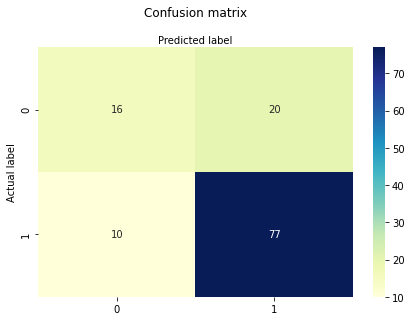

In [121]:
# Visualizing Confusion Matrix using Heatmap
class_names=['0', '1'] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create hetmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [122]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7560975609756098


In [123]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.7938144329896907


In [124]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.8850574712643678


In [125]:
y_test.value_counts()

1    87
0    36
Name: Loan_Status, dtype: int64

In [126]:
np.unique(y_pred)

array([0, 1])

Area under the ROC curve : 0.664751


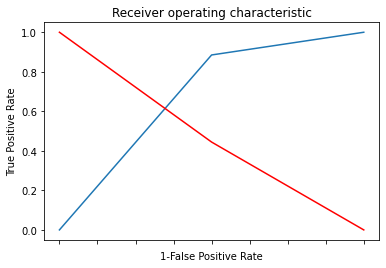

In [127]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})


optCutOff = roc.loc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])
plt.show()

Try paramater grid search to improve the results

In [128]:
optCutOff

,fpr,tpr,1-fpr,tf,thresholds
1,0.555556,0.885057,0.444444,0.440613,1


In [129]:
# note use predict_Proba

### XGBoost

In [130]:
n_estimators=100
criterion='mse'
max_depth=None
n_jobs=-1
# fit model no training data
model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth)
model.fit(X_train, y_train)

[01:33:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

<AxesSubplot:>

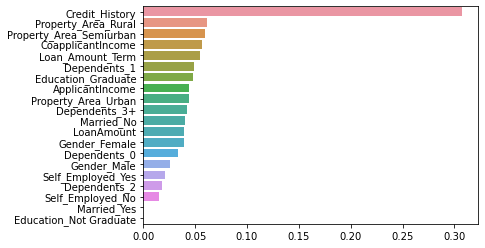

In [132]:
# feature importance
feature_imp = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)

In [133]:
feature_imp

Credit_History             0.307547
Property_Area_Rural        0.061074
Property_Area_Semiurban    0.059664
CoapplicantIncome          0.056442
Loan_Amount_Term           0.054558
Dependents_1               0.049093
Education_Graduate         0.048362
ApplicantIncome            0.044302
Property_Area_Urban        0.043683
Dependents_3+              0.041936
Married_No                 0.040597
LoanAmount                 0.039149
Gender_Female              0.039090
Dependents_0               0.033610
Gender_Male                0.025986
Self_Employed_Yes          0.020968
Dependents_2               0.018370
Self_Employed_No           0.015571
Married_Yes                0.000000
Education_Not Graduate     0.000000
dtype: float32

In [134]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# model evaluation using confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix # Diagonal values represent accurate predictions, non diagonal elements are inaccurate predictions.

array([[19, 17],
       [12, 75]])

Text(0.5, 257.44, 'Predicted label')

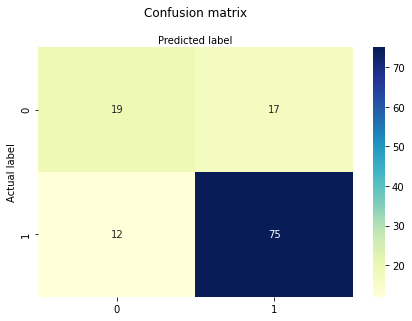

In [135]:
# Visualizing Confusion Matrix using Heatmap
class_names=['0', '1'] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create hetmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [136]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7642276422764228


In [137]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8152173913043478


In [138]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.8620689655172413


In [139]:
y_test.value_counts()

1    87
0    36
Name: Loan_Status, dtype: int64

In [140]:
np.unique(y_pred)

array([0, 1])

Area under the ROC curve : 0.694923


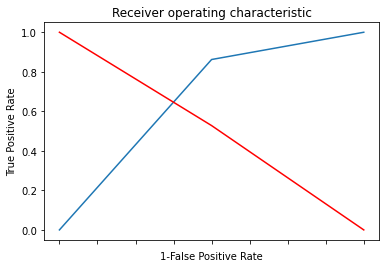

In [141]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})


optCutOff = roc.loc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])
plt.show()

Try paramater grid search to improve the results

In [142]:
optCutOff

,fpr,tpr,1-fpr,tf,thresholds
1,0.472222,0.862069,0.527778,0.334291,1


In [143]:
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
175,-0.312326,0.117226,-0.209164,0.273231,0.540954,-0.472343,0.505592,-0.736691,0.736691,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.477493,-0.392601,1.558899,-0.782016,-0.700208
330,-0.167013,0.058742,-0.191844,0.273231,0.540954,-0.472343,0.505592,1.357421,-1.357421,-1.190514,2.240448,-0.443713,-0.300975,0.528362,-0.528362,0.477493,-0.392601,-0.641478,-0.782016,1.428147
166,-0.134412,-0.554487,-0.279971,0.273231,0.540954,2.117107,-1.977878,-0.736691,0.736691,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.477493,-0.392601,1.558899,-0.782016,-0.700208
50,-0.569368,0.007782,-0.508645,0.273231,0.540954,2.117107,-1.977878,-0.736691,0.736691,0.839974,-0.446339,-0.443713,-0.300975,-1.892641,1.892641,0.477493,-0.392601,-0.641478,1.278747,-0.700208
339,-0.203710,-0.554487,-1.199718,0.273231,0.540954,2.117107,-1.977878,1.357421,-1.357421,0.839974,-0.446339,-0.443713,-0.300975,0.528362,-0.528362,0.477493,-0.392601,-0.641478,1.278747,-0.700208


### SVM - SVC

In [144]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=1, gamma='auto') # Polynomial Kernel

In [145]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(C=1, gamma='auto')

In [146]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [147]:
# model evaluation using confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix # Diagonal values represent accurate predictions, non diagonal elements are inaccurate predictions.

array([[18, 18],
       [ 7, 80]])

Text(0.5, 257.44, 'Predicted label')

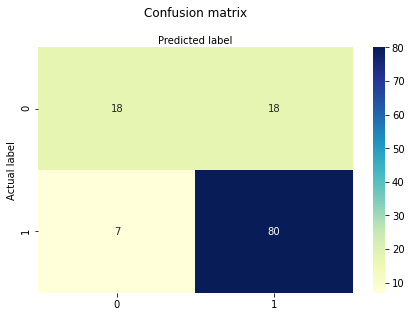

In [148]:
# Visualizing Confusion Matrix using Heatmap
class_names=['0', '1'] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create hetmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [149]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7967479674796748


In [150]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.8163265306122449


In [151]:
# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9195402298850575


In [152]:
y_test.value_counts()

1    87
0    36
Name: Loan_Status, dtype: int64

In [153]:
np.unique(y_pred)

array([0, 1])

Area under the ROC curve : 0.709770


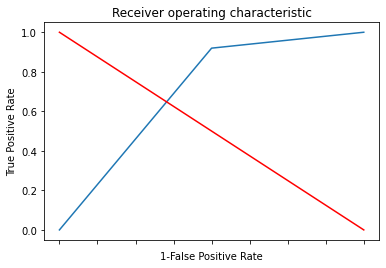

In [154]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})


optCutOff = roc.loc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])
plt.show()

Try paramater grid search to improve the results

In [98]:
optCutOff

,fpr,tpr,1-fpr,tf,thresholds
1,0.527778,0.931034,0.472222,0.458812,1


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [68]:
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

from sklearn.ensemble import RandomForestClassifier

import pickle

In [142]:
df_dummy.head()

,Gender_Female,Gender_Male,Gender_Not_specified,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Not_specified,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1
1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0
2,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1
3,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
4,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python